In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import Data, Visualisation, Preprocessing
import seaborn as sns


In [2]:
folder = 'ana_traj_stats'
subjIDs = range(1, 11)

# Accumulate travelling distance

In [3]:
def compute_distance(x, y):
    # Compute accumulated distance
    dx = np.diff(x)
    dy = np.diff(y)
    dist = np.sqrt(dx**2 + dy**2)
    # remove nan
    dist = dist[~np.isnan(dist)]
    return dist



In [4]:
def compute_dist_acc(subjID, phase):
    gaze_data_epoch = Data.loadEyeData_epoched(subjID, phase)
    df_trial = Data.loadTrainInfo(subjID, phase, addSubjID=True)
    nEpoch = len(gaze_data_epoch)
    dist_all = []
    for iEpoch in range(nEpoch):
        x, y = Preprocessing.gaze_data2xy(gaze_data_epoch[iEpoch])
        dist_all.append(compute_distance(x, y))
    dist_acc = [np.cumsum(dist)[-1] for dist in dist_all]
    df_trial['dist_acc'] = dist_acc
    return df_trial

phase = 2
df_trial_all = [compute_dist_acc(subjID, phase) for subjID in subjIDs]
df_trial_all = pd.concat(df_trial_all, axis=0)
df_trial_all.head()

,trial,delay,rating,subjID,dist_acc
0,0,3,0.0,1,73.802693
1,1,2,8.2,1,65.240478
2,2,1,9.9,1,72.041132
3,3,0,10.0,1,53.553079
4,4,1,1.7,1,27.055155


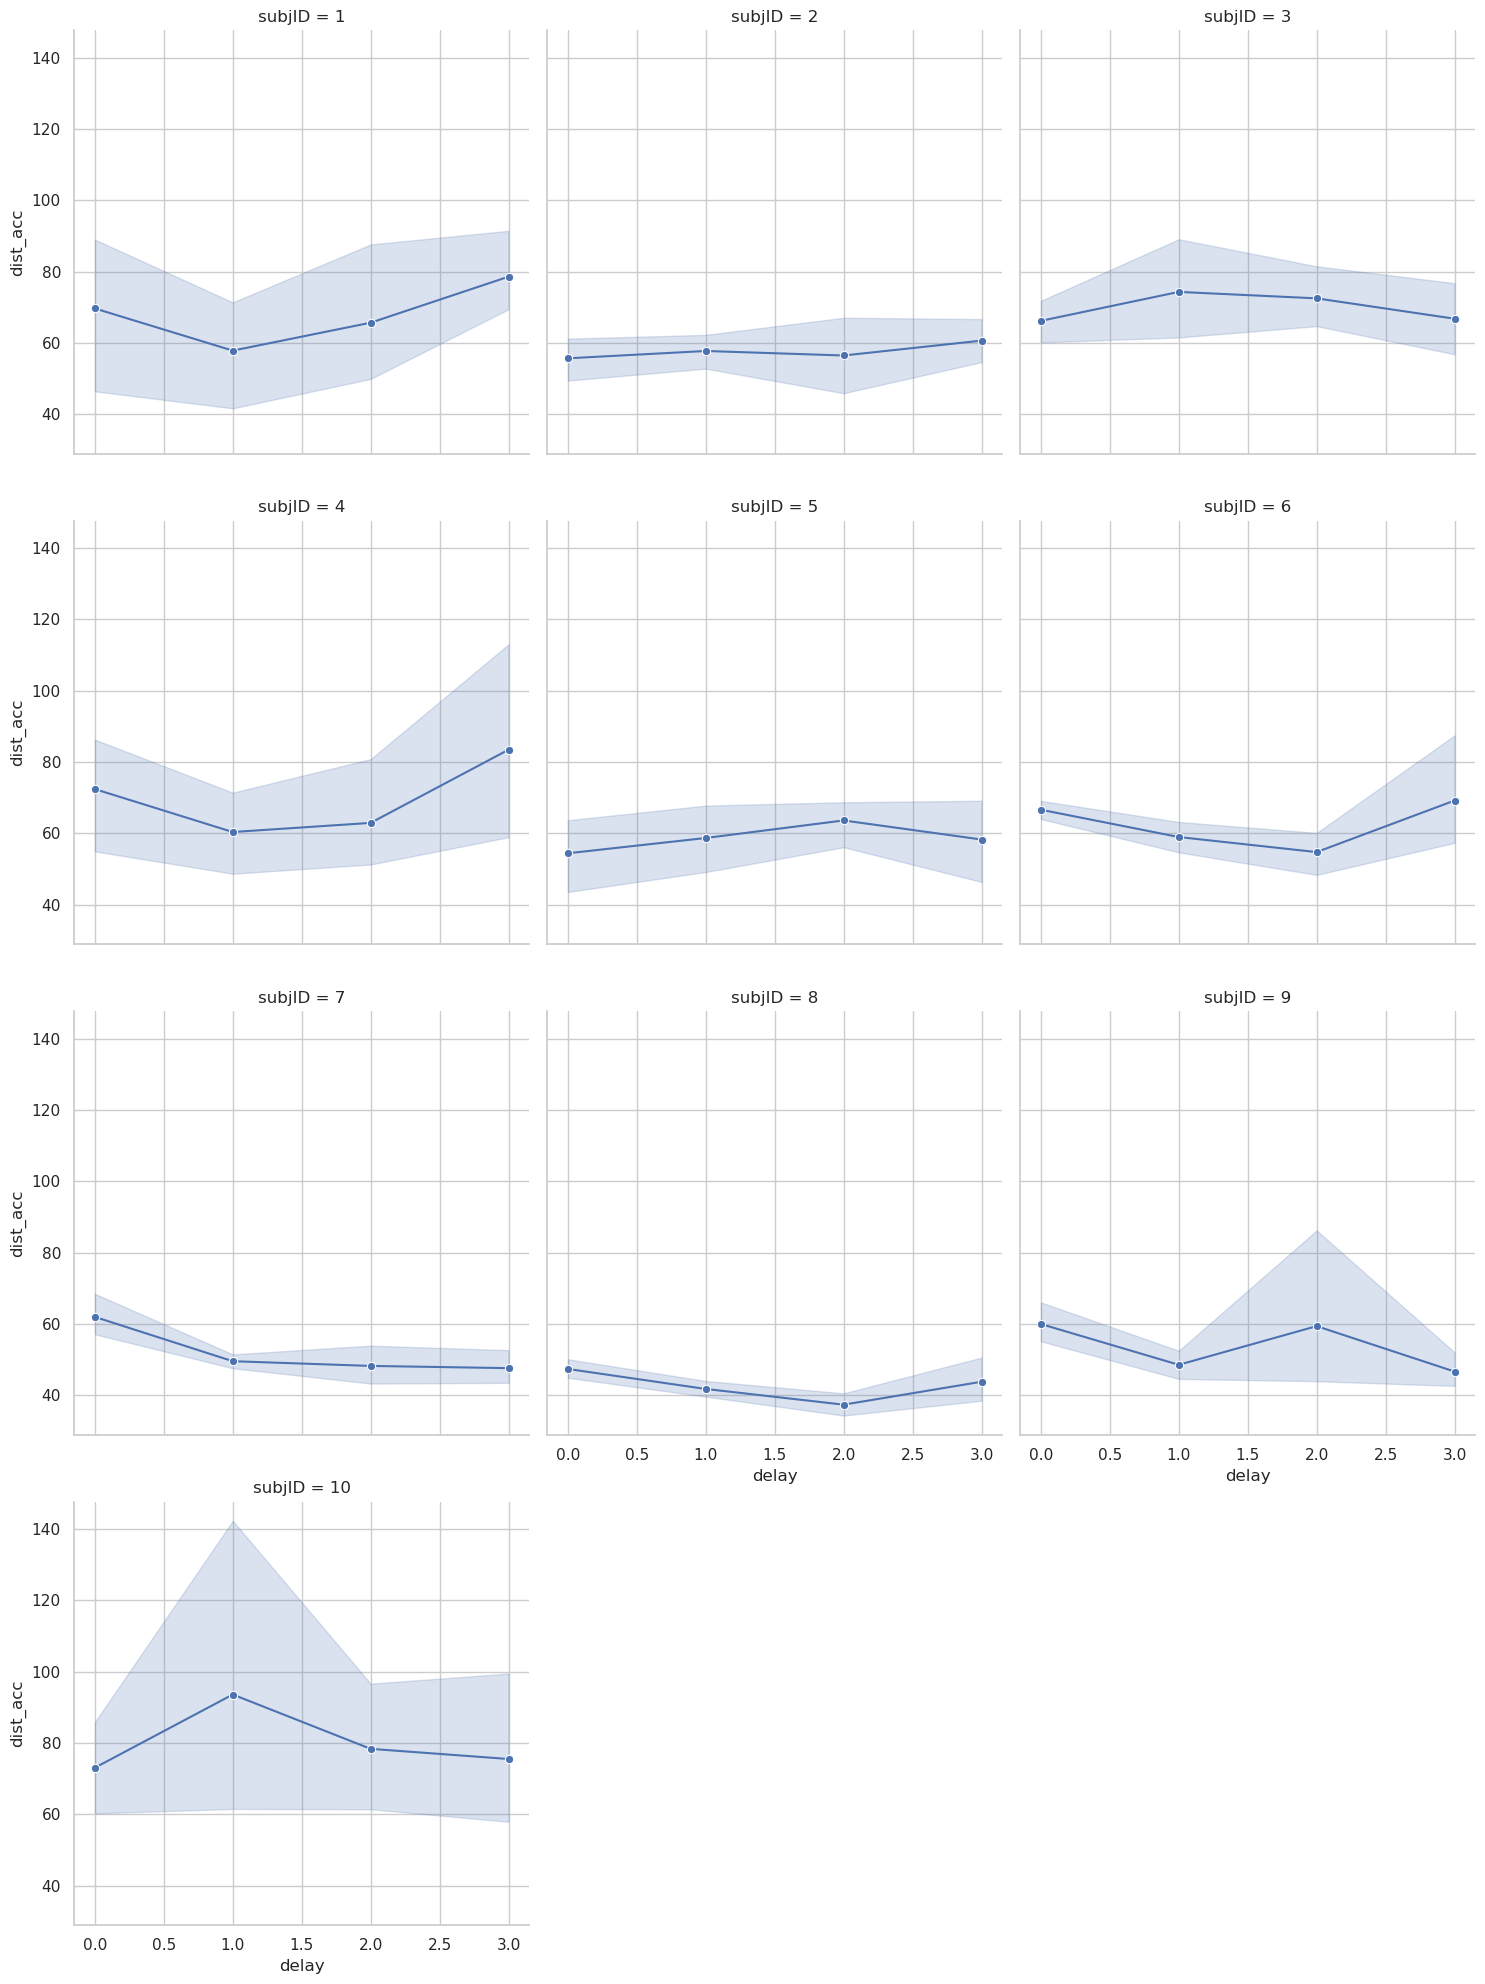

In [5]:
# plot dist_acc
sns.set_theme(style="whitegrid")
g = sns.relplot(data=df_trial_all, x='delay', y='dist_acc', marker='o', col='subjID', col_wrap=3, kind='line')

# Distance distribution 

In [6]:
def dist_distribution(subjID, phase):
    gaze_data_epoch = Data.loadEyeData_epoched(subjID, phase)
    df_trial = Data.loadTrainInfo(subjID, phase, addSubjID=True)
    nEpoch = len(gaze_data_epoch)
    dist_all = []
    for iEpoch in range(nEpoch):
        x, y = Preprocessing.gaze_data2xy(gaze_data_epoch[iEpoch])
        dist_all.append(compute_distance(x, y))
    return dist_all

dist_all = [dist_distribution(subjID, phase) for subjID in subjIDs]


In [7]:
# plot dist distribution
def compute_dist(subjID, phase):
    gaze_data_epoch = Data.loadEyeData_epoched(subjID, phase)
    df_trial = Data.loadTrainInfo(subjID, phase, addSubjID=True)
    nEpoch = len(gaze_data_epoch)

    df_all = []
    for iEpoch in range(nEpoch):
        x, y = Preprocessing.gaze_data2xy(gaze_data_epoch[iEpoch])
        dist = compute_distance(x, y)

        df_ = pd.DataFrame({'dist': dist})
        df_['subjID'] = subjID
        df_['trial'] = df_trial['trial'].to_numpy()[iEpoch]
        df_['delay'] = df_trial['delay'].to_numpy()[iEpoch]
        df_all.append(df_)
    df_all = pd.concat(df_all, axis=0)
    return df_all

df_all = [compute_dist(subjID, phase) for subjID in subjIDs]
df_all = pd.concat(df_all, axis=0)


# sns.set_theme(style="whitegrid")
# sns.displot(data=dist_all[0][0], kind="kde")


In [8]:
df_all.head()

,dist,subjID,trial,delay
0,0.003437,1,0,3
1,0.004123,1,0,3
2,0.004020,1,0,3
3,0.002500,1,0,3
4,0.003314,1,0,3


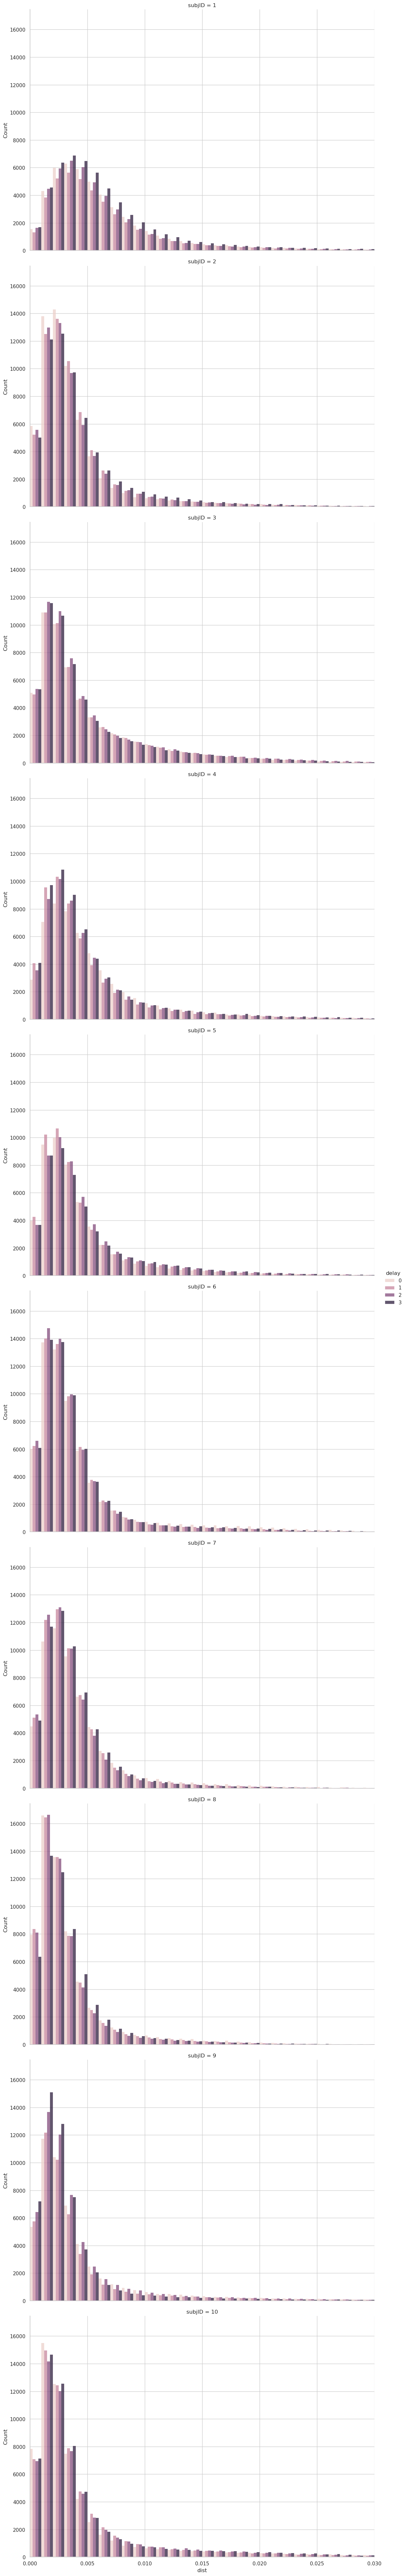

In [9]:
# filter to keep subjID 1
df_all_ = df_all[df_all["subjID"] == 2]
g = sns.displot(
    data=df_all,
    x="dist",
    hue="delay",
    kind="hist",
    row="subjID",
    fill=True,
    binwidth=0.001,
    multiple="dodge",
    height=8,
    aspect=1.5,
)
g.set(xlim=(0, 0.03))